In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from joblib import load
import random
fire_images = glob.glob("/content/drive/My Drive/fire_dataset/fire_images/*.png")
nofire_images = glob.glob("/content/drive/My Drive/fire_dataset/non_fire_images/*.png")

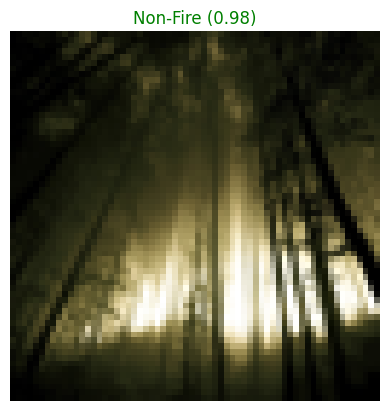

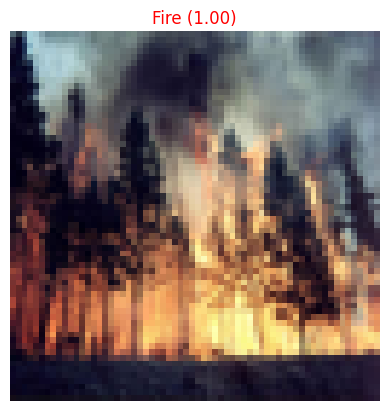

In [5]:
import joblib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

model_path = "classifier.joblib"
model = joblib.load(model_path)

image_paths = ["/content/drive/My Drive/fire_dataset/non_fire_images/non_fire.4.png",
               "/content/drive/My Drive/fire_dataset/fire_images/fire.4.png"]  

# Process each image
for image_path in image_paths:
    img = Image.open(image_path)
    img = img.resize((64, 64))
    if img.mode == "RGBA" or img.mode == "L":
        print(f"Invalid image format: {image_path}")
        continue

    img = np.array(img)
    if len(img.shape) != 3 or img.shape[2] != 3:
        print(f"Invalid image shape: {image_path}")
        continue
    img = img / 255.0
    img = img.flatten().reshape(1, -1)

    prediction = model.predict(img)
    probability = model.predict_proba(img)[0, prediction[0]]
    label = "Fire" if prediction[0] == 0 else "Non-Fire"

    plt.imshow(img.reshape(64, 64, 3))
    if label == "Fire":
        plt.title(f"{label} ({probability:.2f})", color="red")
    else:
        plt.title(f"{label} ({probability:.2f})", color="green")
    plt.axis("off")
    plt.show()
